In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from tqdm import tqdm
import os
import csv
import spacv


import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.model_selection import KFold
import geopandas as gpd

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import matplotlib.gridspec as gridspec

from deforestutils import *

from joblib import dump, load
from joblib import Parallel, delayed




/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

Base Files setup.
Starting fit for 2004
Read in data for 2004
Years in data: [2004 2005 2006 2007]
Number of rows in data: (665048, 216)


The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated a

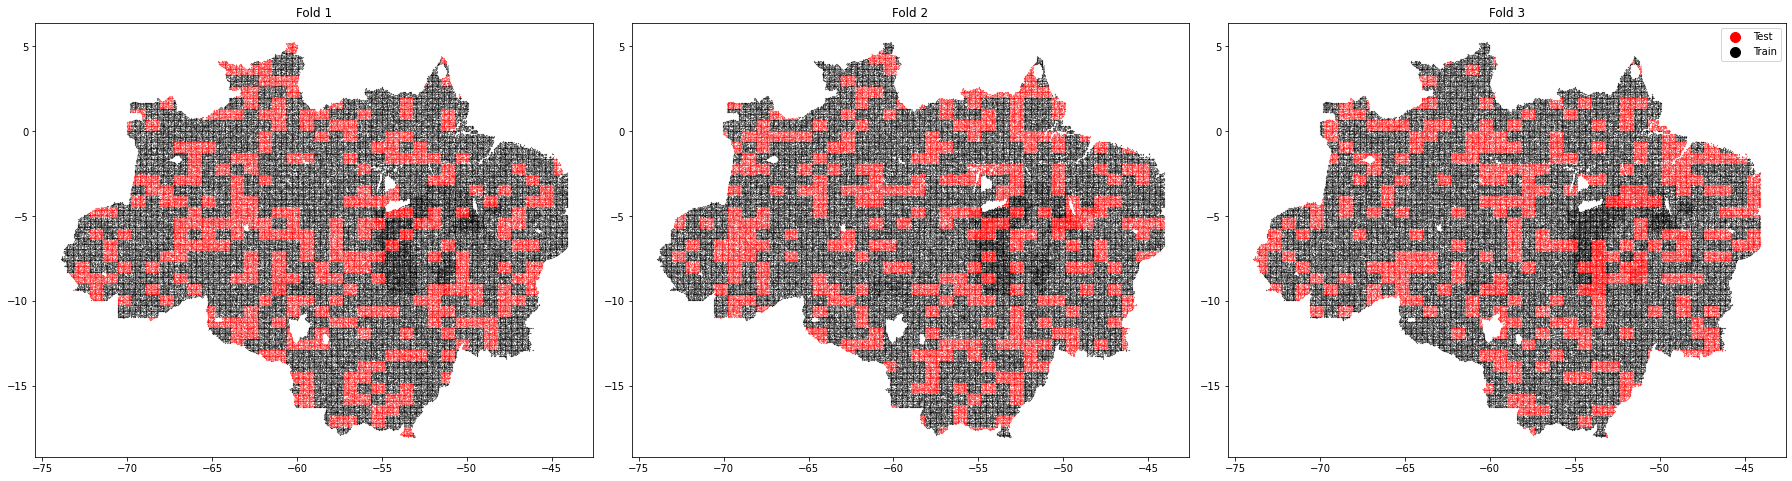

Base Files setup for fold at FeatureImportanceResults/2004_2005_2006_PREDICT_2007/2004_2005_2006_PREDICT_2007_FOLD0/.


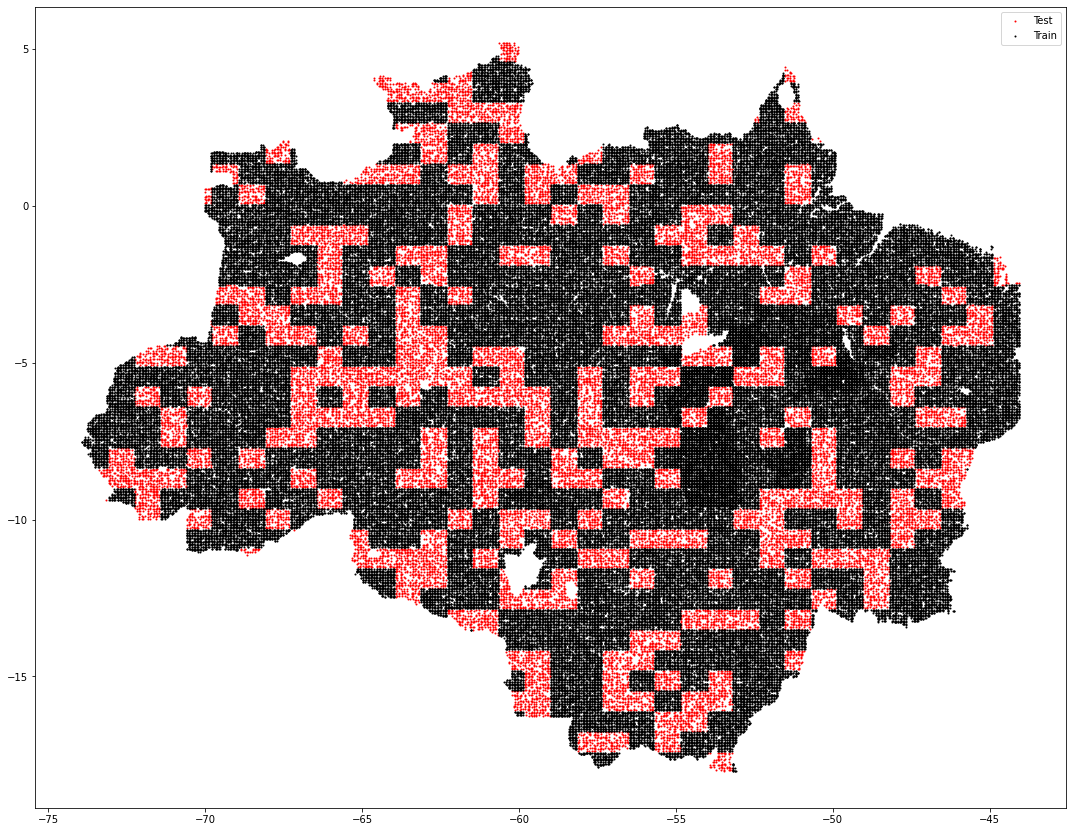

Base Files setup for fold at FeatureImportanceResults/2004_2005_2006_PREDICT_2007/2004_2005_2006_PREDICT_2007_FOLD1/.


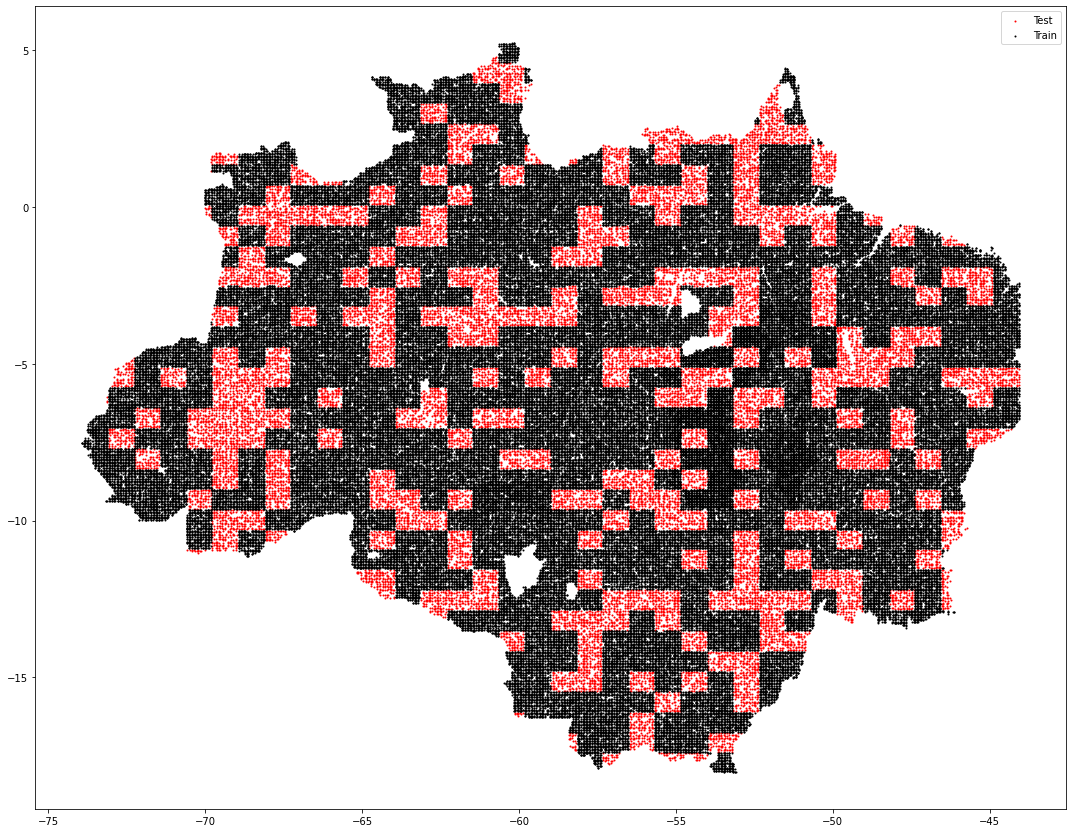

Base Files setup for fold at FeatureImportanceResults/2004_2005_2006_PREDICT_2007/2004_2005_2006_PREDICT_2007_FOLD2/.


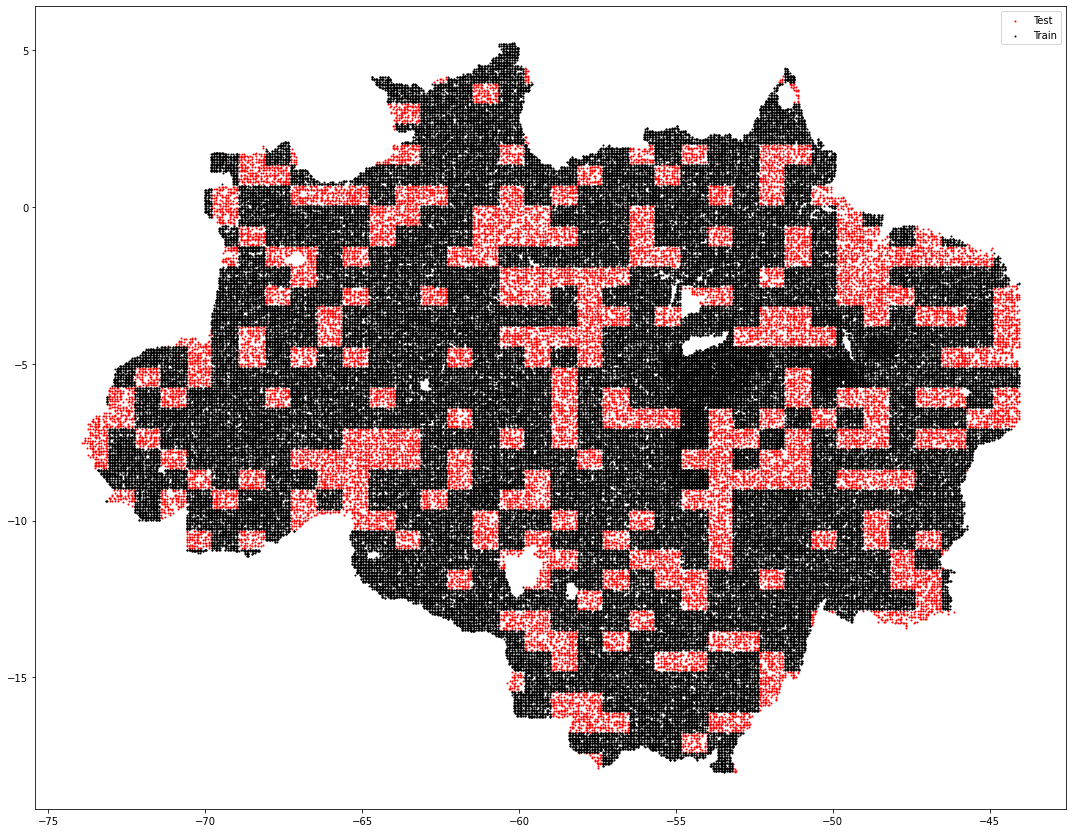

100%|██████████| 1/1 [04:42<00:00, 282.03s/it]


In [2]:
#for year
    #split points into 3 groups with METHOD
    #for i in range 3
        #train all and get feature importsnace
    #average across those 3 results of feature importance..mse..predictions.

first_time = True
GET_NULLS = False
YEAR_LIST = [2004]

RANDOM_FOREST = False
LASSO = False
GRADIENT_BOOSTING = False
SUPER_LEARNER = False
ANALYZE_PREDICTIONS = False
PLOT_FEATURE_IMPORTANCE = False
EVOLUTION = False
MSE = False

PLOT_ENTIRE_AREA = True
PLOT_FOLDS = True

SUBSET = True
SUBSET_SIZE = 300000
BASE_PATH = 'FeatureImportanceResults'
NUMBER_YEARS_TRAIN = 3

CROSS_VALIDTION_METHOD = 'hblock' #random, municipality, spatialkfold, 

#BASE_PATH/ FOLDER_NAME / FOLD_FOLDER_NAME

setup_base_files(BASE_PATH)

for this_start_year in tqdm(YEAR_LIST):
    START_YEAR_TRAIN = this_start_year
    YEARS_TO_TRAIN = [START_YEAR_TRAIN + u  for u in range(NUMBER_YEARS_TRAIN + 1)]
    PREDICT_YEAR = START_YEAR_TRAIN + NUMBER_YEARS_TRAIN
    FOLDER_NAME = ''.join([f'{START_YEAR_TRAIN + u}_' for u in list(range(NUMBER_YEARS_TRAIN))]) + f'PREDICT_{PREDICT_YEAR}'
    print(f'Starting fit for {this_start_year}')
    setup_year_files(BASE_PATH, FOLDER_NAME)

    df_full = get_full_data(START_YEAR_TRAIN, YEARS_TO_TRAIN)

    if SUBSET: df_full = df_full.sample(SUBSET_SIZE).reset_index(drop=True)

    X, Y = split_XY(df_full)

    folds = get_3_fold_test_train(X, Y, df_full, method = CROSS_VALIDTION_METHOD, SAVE = False)
    plot_3_folds(X, df_full, folds, f'{BASE_PATH}/{FOLDER_NAME}', method = CROSS_VALIDTION_METHOD)

    for i in range(3):
        FOLD_PATH = FOLDER_NAME + f'_FOLD{i}'
        FILE_PATH = f'{BASE_PATH}/{FOLDER_NAME}/{FOLD_PATH}'
        setup_fold_files(BASE_PATH, FOLDER_NAME, FOLD_PATH)

        train_inds, test_inds = folds[i]
        X_train, X_test, Y_train, Y_test = split_test_train(df_full, train_inds, test_inds, PREDICT_YEAR, PLOT_ENTIRE_AREA, FILE_PATH)
    

#     X_train, X_test, Y_train, Y_test = split_test_train(df_full, train_inds, test_inds, PREDICT_YEAR, PLOT_ENTIRE_AREA, NEW_INDICES, FILE_PATH, FOLDER_NAME)

#     if NEW_CV_INDICES:
#         muni_cv = get_new_cv(X_train, Y_train, FOLDER_NAME, PLOT_FOLDS, df_full, PREDICT_YEAR, FILE_PATH)
#     if not NEW_CV_INDICES:
#         muni_cv = get_prev_cv(FOLDER_NAME)

#     if GET_NULLS: get_null_count(X_train, FOLDER_NAME)
            
#     X_train = X_train.drop('geometry', axis = 1)
#     X_test = X_test.drop('geometry', axis = 1)
    

#     #random forest
#     if RANDOM_FOREST:
#         randomforest_features_df = train_random_forest(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

#     #lasso 
#     if LASSO:
#         lasso_features_df = train_lasso(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

#     #gradient boosting
#     if GRADIENT_BOOSTING:
#         gradient_boosting_features_df = train_gradient_boost(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)
    
#     #neural network
#     if NEURAL_NETWORKS:
#         nn_features_df = train_neural_network(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

#     #super learner ensemble
#     if SUPER_LEARNER:
#         base_learners = get_base_learners(FOLDER_NAME)
#         super_learner_features_df = train_super_learner(X_train, Y_train, X_test, Y_test, FILE_PATH, muni_cv, base_learners, FOLDER_NAME)

#     #visualize
#     if ANALYZE_PREDICTIONS:
#         yhat_list = get_yhat_list(FOLDER_NAME)
#         visualize_predictions(yhat_list, Y_test, FILE_PATH, FOLDER_NAME)
#         visualize_predictions_single_plot(yhat_list, Y_test, FILE_PATH, FOLDER_NAME)

#     if PLOT_FEATURE_IMPORTANCE:
#         for method in ['randomforest', 'lasso', 'gradientboosting', 'neuralnetwork', 'superlearner']:
#             plot_feature_importance(FILE_PATH, FOLDER_NAME, method, use_abs = True)
#             plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = False, INCLUDE_FOREST = False, use_abs = True)

#         plot_feature_importance_all_methods(X_train, FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = True, use_abs = True)
#         plot_feature_importance_all_methods(X_train, FILE_PATH, FOLDER_NAME, method, SHOW = False, INCLUDE_FOREST = False, use_abs = True)

# if EVOLUTION:
#     #analysis for all years:
#     for method_string in ['randomforest', 'lasso', 'gradientboosting', 'neuralnetwork', 'superlearner', 'avg']:
#         feature_importance_evolution(method_string, INCLUDE_FOREST = False)

# if MSE:
#     plot_MSE()
    

In [3]:
df_full.head()

,Unnamed: 0,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,...,water,soybean,rice,other_crop,coffee,citrus,other_perennial,forest_lag,forest_diff,def
0,387472,1303502.0,16.0,8008263,-68.775,-7.825,2006,81.0,93.00,30.43021,...,0.0,0.0,0.0,0.0,0,0,0.0,3.086714,0.000000,0.000000
1,336347,5107958.0,4.0,8764257,-58.275,-14.575,2005,27.0,18.75,24.50807,...,0.0,0.0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000
2,40678,1302405.0,-8.0,8267508,-65.175,-9.325,2004,93.0,88.00,29.37753,...,0.0,0.0,0.0,0.0,0,0,0.0,3.062387,0.000000,0.000000
3,457345,1708205.0,-1.0,9340418,-50.275,-12.125,2006,15.0,29.50,20.25909,...,0.0,0.0,0.0,0.0,0,0,0.0,0.006122,0.000000,0.000000
4,110323,1506187.0,-15.0,9455768,-48.675,-4.625,2004,73.0,56.50,28.11832,...,0.0,0.0,0.0,0.0,0,0,0.0,1.954122,-0.085085,0.085085


In [ ]:
from scipy.stats import gaussian_kde

kde = gaussian_kde([df_full.x, df_full.y])
density = kde([df_full.x, df_full.y])


<Axes: >

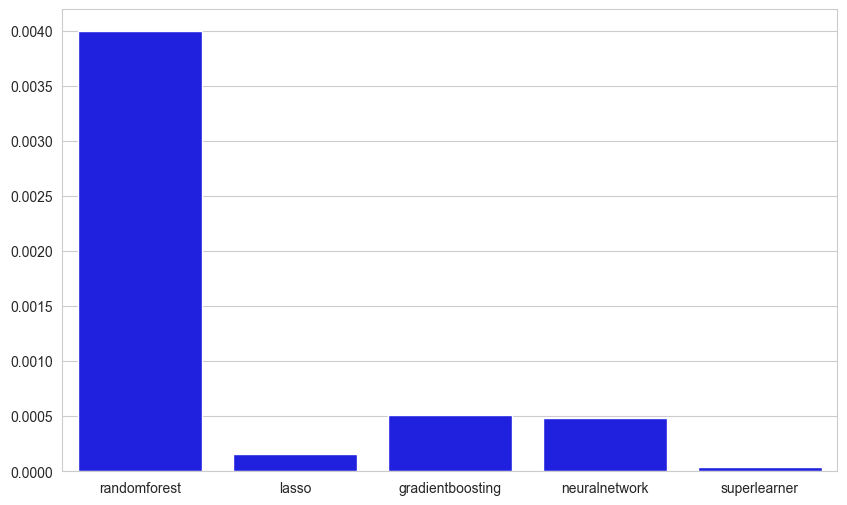

In [ ]:
file_path = FILE_PATH + '/performance.txt'
with open(file_path, "r") as file:
    lines = file.readlines()

content_list = [line.strip() for line in lines][2:]
split_list = [s.split(' MSE: ') for s in content_list]

labels = [e[0] for e in split_list]
values = [float(e[1]) for e in split_list]

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y=values, x=labels, color='blue', orient = 'v')


In [ ]:
values

[0.003996678030490013,
 0.0001577119711700281,
 0.0005126619858697259,
 0.0004796600448663341,
 3.938500153292077e-05]

In [ ]:
def plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = True, use_abs = True):
    file_path = FILE_PATH + 'FeatureImportance/' + method + '.csv'

    df = pd.read_csv(file_path, index_col=0)
    file_path_save = FILE_PATH + 'FeatureImportance/' + 'features_' + method

    if not INCLUDE_FOREST:
        df = df[~df.Feature.isin(['forest_lag', 'forest_formation'])]
        file_path_save = FILE_PATH + 'FeatureImportance/' + 'features_exclude_forest_vars_' + method

    abs_sum = df['Coeff'].abs().sum()
    df['Coeff'] = df['Coeff'] / abs_sum

    coeff_values = df['Coeff'].head(10)
    feature_labels = df['Feature'].head(10)

    if abs:
        coeff_values = (abs(coeff_values))

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coeff_values, y=feature_labels, color='green')

    # Set plot title and labels
    plt.title(FOLDER_NAME + ' ' + method.upper() )
    #plt.xlabel('Abs')
    #plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(file_path_save)
    if SHOW: plt.show()

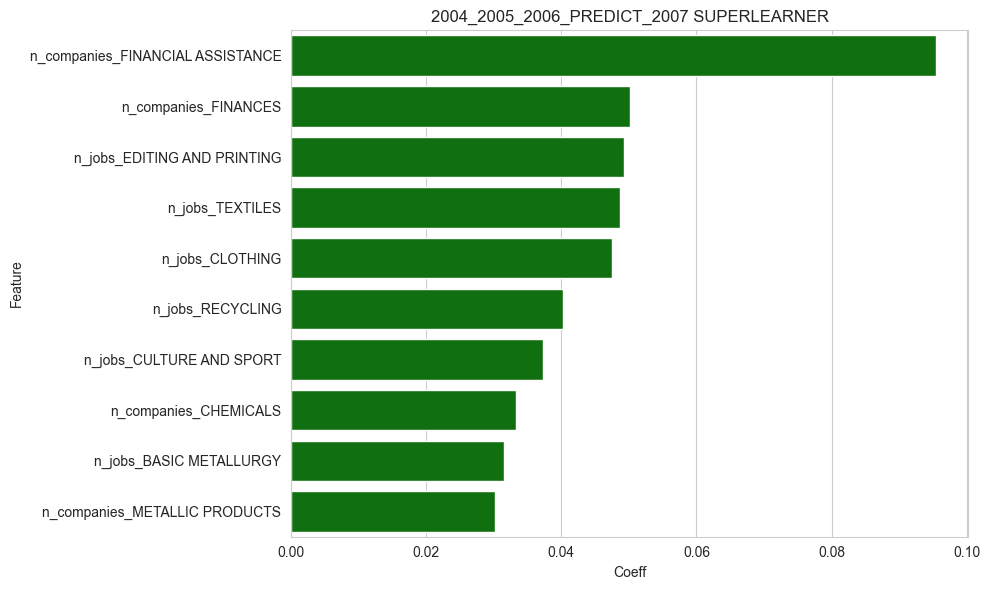

In [ ]:
plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = False, use_abs = True)

In [ ]:
df.head()

,Feature,Coeff
203,forest_lag,-0.479329
187,forest_formation,0.479158
37,n_companies_FINANCIAL ASSISTANCE,-0.003964
45,n_companies_FINANCES,0.002084
94,n_jobs_EDITING AND PRINTING,0.002048


In [ ]:
dict(zip(get_x_cols(), np.repeat(np.nan, len(get_x_cols()))))

{'year': nan,
 'rain1': nan,
 'elevation': nan,
 'slope': nan,
 'aspect': nan,
 'near_mines': nan,
 'near_roads': nan,
 'near_hidrovia': nan,
 'indigenous_homol': nan,
 'mun_election_year': nan,
 'new_forest_code': nan,
 'lula': nan,
 'dilma': nan,
 'temer': nan,
 'bolsonaro': nan,
 'fed_election_year': nan,
 'populacao': nan,
 'pib_pc': nan,
 'ironore': nan,
 'silver': nan,
 'copper': nan,
 'gold': nan,
 'soy_price': nan,
 'beef_price': nan,
 'ag_jobs': nan,
 'mining_jobs': nan,
 'public_jobs': nan,
 'construction_jobs': nan,
 'PIB': nan,
 'n_companies_PUBLIC ADMIN': nan,
 'n_companies_AGRICULTURE': nan,
 'n_companies_FOOD AND DRINKS': nan,
 'n_companies_ACCOMODATION AND FOOD': nan,
 'n_companies_EQUIPMENT RENTAL': nan,
 'n_companies_WHOLESALE': nan,
 'n_companies_ASSOCIATIVE ACTIVITIES': nan,
 'n_companies_AUTOMOBILES AND TRANSPORT': nan,
 'n_companies_FINANCIAL ASSISTANCE': nan,
 'n_companies_TRADE REP VEHICLES': nan,
 'n_companies_CONSTRUCTION': nan,
 'n_companies_MAIL AND TELECOM'